**Introducción**

En los últimos años, la seguridad pública se ha convertido en uno de los problemas más críticos en México. Sin embargo, la delincuencia no ocurre de manera aislada, sino que está vinculada a condiciones sociales, económicas y personales que afectan a la población. Este estudio adopta la premisa de que la marginación no representa sólo una carencia material, sino una restricción de oportunidades que puede actuar como un promotor de la conducta delictiva.

Al integrar indicadores socioeconómicos con estadísticas criminales, este proyecto explora una visión preventiva basada en datos. El objetivo es identificar si mejorar la calidad de vida y el acceso a servicios básicos puede ser interpretado, mediante modelos de Inteligencia Artificial, como una estrategia efectiva para reducir la violencia en el país.

**Planteamiento del Problema**

Este proyecto busca cuantificar esa relación: ¿Qué tanto explica la marginación social el nivel de violencia en un estado? A través de un modelo de regresión, esperamos aprender cuáles son los indicadores socioeconómicos que tienen mayor peso predictivo, permitiendo identificar áreas de intervención prioritaria para las políticas públicas.

Para la ejecución de este análisis, se ha construido un grupo de datos integrado por fuentes oficiales del Gobierno de México, asegurando que la información sea fidedigna y representativa del contexto nacional actual

- Incidencia Delictiva: Los datos de criminalidad provienen del Secretariado Ejecutivo del Sistema Nacional de Seguridad Pública (SESNSP). Estos registros se generan a partir de las carpetas de investigación iniciadas en las Agencias del Ministerio Público de las 32 entidades federativas. Se utiliza el dataset procesado por Beelzabi Tor (Kaggle), el cual consolida las cifras de incidencia delictiva. De esta fuente extraemos el volumen anual de delitos para calcular nuestra variable objetivo.
  
- Índices de Marginación (2015 y 2020): Para explorar la causalidad socioeconómica, se integran los índices desarrollados por la Secretaría General del Consejo Nacional de Población (CONAPO). Este índice es una medida que permite identificar las desigualdades en los diferentes estados de México. Se basa en datos censales y mide carencias en educación, vivienda, distribución de la población e ingresos monetarios. Se utilizarán los cortes de 2015 y 2020. Estos datos proporcionan las variables independientes ($X$) necesarias para el modelo, tales como el porcentaje de analfabetismo, población sin servicios básicos y precariedad económica.

- Temporalidad y Reto Técnico: Debido a que la publicación de CONAPO se realiza cada 5 años, el proyecto enfrenta un reto de disponibilidad de datos para el periodo intermedio de 2016-2019 y posterior de 2021-2023. Por ello, en el contexto de este estudio se implementará una técnica de interpolación lineal y modelado predictivo para completar la serie temporal, permitiendo un análisis más robusto a través de los años.

La variable a predecir es la Tasa de Incidencia Delictiva por cada 100,000 habitantes. Debido a que el uso de cifras absolutas como el número de delitos puede sesgar el modelo hacia los estados más poblados. Al normalizar la cifra por cada 100 mil habitantes, obtenemos una métrica comparable entre estados con poblaciones distintas. Se ha seleccionado un enfoque de regresión debido a que nuestra variable de interés (Tasa de Incidencia Delictiva) es de naturaleza numérica y continua. A diferencia de un modelo de clasificación, la regresión nos permite no solo predecir un valor, sino realizar un análisis de inferencia para cuantificar la magnitud del impacto de cada factor social.

**Exploración y comprensión del conjunto de datos**

Antes de proceder a la integración de la información, realizamos una inspección de los datos en bruto. Este paso es vital para comprender qué variables contiene cada uno de los conjuntos de datos. A continuación, se detallan las variables contenidas en cada fuente:

$Incidencia$ $Delictiva$ $(SESNSP)$

Cada fila representa un tipo de delito específico en un estado y año determinado, con el conteo mensual distribuido en 12 columnas. Este archivo cuenta con 84,097 registros y 21 variables. Incluye información temporal (año), geográfica (estado), categórica (tipo y subtipo de delito) y cuantitativa (cifras mensuales de incidencia).
- Año (numérico): Indica el periodo anual del registro (útil para filtrar nuestros objetivos 2015 y 2020).
- Clave_Entidad (numérico): Código numérico oficial de cada estado.
- Entidad (texto): Nombre de la entidad federativa (variable que requiere limpieza por acentos).
- Bien jurídico afectado (texto): Clasificación legal del daño (ej. La vida y la integridad corporal, El patrimonio).
- Tipo de delito (texto): Categorización del crimen (Robo, Homicidio, Secuestro, etc.).
- Subtipo de delito (texto): Clasificación más específica del acto delictivo.
- Modalidad (texto): Detalles adicionales sobre cómo se cometió el delito.
- Enero - Diciembre (numérico): Doce columnas numéricas que contienen el conteo de delitos para cada mes del año.
- Sexo/Averiguacion (texto): Género de la persona involucrada o tipo de expediente.
- Rango de edad (texto): Clasificación etaria (ej. Adultos, Menores de edad).

$Marginación$ $Social$ $(CONAPO$ $2015$ $y$ $2020)$

Cada fila representa un estado con sus respectivos indicadores sociodemográficos calculados para el año 2015 y 2020. Este archivo cuenta con 32 registros uno por cada estado y 17 variables. Contiene el índice de marginación, el grado de exclusión y porcentajes específicos de carencias en educación, vivienda e ingresos.
- CVE_ENT (numérico): Clave de la entidad federativa.
- NOM_ENT (texto): Nombre oficial del estado.
- POB_TOT (numérico): Población total (base para el cálculo de la tasa).
- ANALF (decimal): % de población analfabeta (15 años o más).
- SBASC (decimal): % de población sin educación básica.
- OVSDE (decimal): % de viviendas sin drenaje ni excusado.
- OVSEE (decimal): % de viviendas sin energía eléctrica.
- OVSAE (decimal): % de viviendas sin agua entubada.
- OVPT (decimal): % de viviendas con piso de tierra.
- VHAC (decimal): % de viviendas con hacinamiento.
- PL_5000 (decimal): % de población en localidades rurales (<5,000 hab).
- PO2SM (decimal): % de población con ingresos de hasta 2 salarios mínimos.
- IM (decimal): Índice de Marginación (Variable continua).
- GM (texto): Grado de Marginación (Variable categórica/ordinal).
- IMN (decimal): Índice de Marginación Normalizado.
- ENTIDAD (texto): Nombre de la entidad para propósitos de indexación.
- NOM_ENT_etq (texto): Nombre de la entidad formateado para etiquetas gráficas.

Tras la inspección inicial, se determinó que los datos de la CONAPO poseen una integridad total, sin valores nulos en las variables predictoras, mientras que el dataset de incidencia delictiva es exhaustivo pero presenta inconsistencias de formato en los nombres de las entidades ya que utiliza acentos.

**Preparación y tratamiento de los datos**

Debido a que utilizaremos dos conjuntos de datos con niveles de detalle distintos, es necesario realizar un proceso de acoplamiento estructural. Mientras que el dataset de marginación ofrece una sola medida por estado al año, el dataset de incidencia delictiva presenta los datos desglosados por tipo de delito, modalidad y categorías demográficas.
Para lograr que ambos conjuntos sean comparables, realizaremos lo siguiente:

1. Se eliminarán las variables que detallan el crimen de forma individual, para poder realizar el análisis estatal. Esto incluye las variables de Bien jurídico afectado, Tipo de delito, Subtipo de delito, Modalidad, Sexo/Averiguación y Rango de edad.

2. Transformaremos los registros de crímenes específicos en registros generales por estado y por año. Sumando las 12 columnas mensuales (Enero a Diciembre) para generar una nueva variable denominada Total_Delitos_Anual.

3. Mediante la función groupby, pasaremos de un dataset de más de 84,000 líneas a uno de 32 filas por cada año de estudio.
   
Aunque al eliminar subtipos de delitos y datos demográficos perdemos el detalle específico de qué se robó o quién fue la víctima, estas acciones nos dejarán nuestro conjunto de datos listo para encontrar la causalidad con la marginalización. Además, se realizaron estos pasos porque un modelo de regresión requiere que cada fila represente la misma unidad de análisis. Al colapsar el dataset de crímenes al nivel estatal, permitimos que la IA analice cómo el entorno socioeconómico de un estado afecta su nivel de violencia global.


In [16]:
import pandas as pd
import unicodedata

# 1. Función para estandarizar nombres de estados (evita errores en el merge futuro)
def limpiar_texto(texto):
    if not isinstance(texto, str): return texto
    texto = unicodedata.normalize('NFD', texto)
    return texto.encode('ascii', 'ignore').decode("utf-8").upper().strip()

# 2. Carga del dataset original
df_crimen = pd.read_csv('crimen_nac.csv', encoding='latin-1')

# 3. SUMATORIA MENSUAL: Creamos 'Total_Delitos_Anual' sumando de Enero a Diciembre
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 
         'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

df_crimen[meses] = df_crimen[meses].fillna(0)
df_crimen['Total_Delitos_Anual'] = df_crimen[meses].sum(axis=1)

# 4. COLAPSAMIENTO ESTRUCTURAL (Eliminamos el detalle individual)
# Al agrupar solo por 'Entidad' y 'Año', las variables de Bien jurídico, Tipo, Subtipo, 
# Modalidad, Sexo y Edad desaparecen automáticamente al no estar en el groupby ni en la suma.
df_crimen_colapsado = df_crimen.groupby(['Entidad', 'Año'])['Total_Delitos_Anual'].sum().reset_index()

# 5. Estandarización de la Entidad
df_crimen_colapsado['Entidad'] = df_crimen_colapsado['Entidad'].apply(limpiar_texto)

print(f"--- PROCESO DE ACOPLAMIENTO COMPLETADO ---")
print(f"Registros originales: {len(df_crimen)}")
print(f"Registros finales (32 estados x año): {len(df_crimen_colapsado)}")
display(df_crimen_colapsado.head(10))

# =================================================================
# 3. PROCESAMIENTO DE DATASETS DE MARGINACIÓN (CONAPO)
# =================================================================
print("\n--- PROCESANDO DATASETS DE MARGINACIÓN (ESTANDARIZACIÓN) ---")

# Carga de los archivos originales
df_m15_raw = pd.read_csv('ime_dp2_2015.csv')
df_m20_raw = pd.read_csv('data-2026-02-16.csv')

def procesar_marginacion(df, anio):
    # 1. Estandarizar nombres de columnas a mayúsculas para evitar errores
    df.columns = df.columns.str.upper()
    
    # 2. Renombrar columnas clave si tienen nombres distintos (IM y NOM_ENT)
    if 'IM' not in df.columns:
        col_im = [c for c in df.columns if 'IM' in c or 'INDICE' in c or 'GM' in c]
        if col_im: df = df.rename(columns={col_im[0]: 'IM'})
            
    if 'NOM_ENT' not in df.columns:
        col_ent = [c for c in df.columns if 'ENT' in c or 'ESTADO' in c]
        if col_ent: df = df.rename(columns={col_ent[0]: 'NOM_ENT'})

    # 3. Selección de variables de interés (Población + Indicadores socioeconómicos)
    # Incluimos POB_TOT para el cálculo posterior de la tasa
    cols_interes = ['NOM_ENT', 'POB_TOT', 'IM', 'ANALF', 'SBASC', 'OVSDE', 
                    'OVSEE', 'OVSAE', 'OVPT', 'VHAC', 'PL_5000', 'PO2SM']
    
    # Filtramos solo las columnas que existan en el dataset actual
    df_filtrado = df[[c for c in cols_interes if c in df.columns]].copy()
    
    # 4. Asignamos el año correspondiente
    df_filtrado['Año'] = anio
    
    return df_filtrado

# Procesamos ambos años y los consolidamos
df_m15_limpio = procesar_marginacion(df_m15_raw, 2015)
df_m20_limpio = procesar_marginacion(df_m20_raw, 2020)

df_marginacion_completa = pd.concat([df_m15_limpio, df_m20_limpio], ignore_index=True)

# 5. Estandarización de nombres de Entidades (igual que en crímenes)
df_marginacion_completa['NOM_ENT'] = df_marginacion_completa['NOM_ENT'].apply(limpiar_texto)

print(f"Dataset de marginación listo: {df_marginacion_completa.shape[0]} registros.")
display(df_marginacion_completa.head())

--- PROCESO DE ACOPLAMIENTO COMPLETADO ---
Registros originales: 84096
Registros finales (32 estados x año): 288


,Entidad,Año,Total_Delitos_Anual
0,AGUASCALIENTES,2015,23238.0
1,AGUASCALIENTES,2016,23769.0
2,AGUASCALIENTES,2017,33578.0
3,AGUASCALIENTES,2018,38880.0
4,AGUASCALIENTES,2019,38479.0
5,AGUASCALIENTES,2020,33680.0
6,AGUASCALIENTES,2021,35687.0
7,AGUASCALIENTES,2022,39627.0
8,AGUASCALIENTES,2023,21755.0
9,BAJA CALIFORNIA,2015,121126.0



--- PROCESANDO DATASETS DE MARGINACIÓN (ESTANDARIZACIÓN) ---
Dataset de marginación listo: 64 registros.


,NOM_ENT,POB_TOT,IM,ANALF,SBASC,OVSDE,OVSEE,OVSAE,OVPT,VHAC,PL_5000,PO2SM,Año
0,AGUASCALIENTES,1312544,17.883964,2.601353,29.721797,0.681147,0.304155,0.813920,0.752952,21.862232,25.162585,34.604084,2015
1,BAJA CALIFORNIA,3315766,18.464138,1.961601,30.077841,0.268934,0.472493,2.817705,1.148904,23.032223,10.349162,22.845516,2015
2,BAJA CALIFORNIA SUR,712029,17.320595,2.505451,29.439127,0.386485,1.136240,7.146918,4.083650,26.230970,15.618886,22.365039,2015
3,CAMPECHE,899931,13.684555,6.681547,35.743791,4.085619,1.589287,6.489314,2.949209,37.931783,30.875478,40.693940,2015
4,COAHUILA DE ZARAGOZA,2954915,18.400944,1.987870,28.055475,0.620634,0.290767,1.665703,0.657853,23.617926,12.148640,27.944015,2015


Esta muestra evidencia que se ha eliminado eficazmente el ruido de variables como el tipo de delito, modalidad, sexo y edad, conservando únicamente el Total_Delitos_Anual como variable dependiente. Asimismo, la normalización de la columna Entidad asegura que los nombres de los estados sean ahora compatibles para el proceso de integración con los datos de marginación, garantizando que el conjunto de datos esté libre de inconsistencias ortográficas y listo para el cálculo de tasas delictivas por cada 100,000 habitantes.

Contamos actualmente con dos datasets limpios: uno de Incidencia Delictiva con una serie continua (2015-2023) y uno de Marginación con datos puntuales (2015 y 2020). El objetivo ahora es generar un modelo de estimación para completar los vacíos de información socioeconómica.

Se realiza la predicción de años faltantes para que un modelo de Inteligencia Artificial pueda aprender la relación entre la pobreza y el crimen utilizando datos comparables año con año. Para eso se realiza una interpolación y proyección estadística la cual calcula los datos de:

- Periodo (2016 - 2019): Estimados mediante interpolación lineal entre los puntos conocidos de 2015 y 2020.

- Periodo (2021 - 2023): Estimados mediante tendencias de crecimiento poblacional y proyección de indicadores socioeconómicos.

Para generar los datos faltantes se siguió una metodología de Interpolación que calcula la línea de tendencia de cada variable, en la cual se asume una relación lineal para generar los datos faltantes de los años entre 2015-2020. Para generar los datos posteriores se utilizó una metodología de extrapolación, la cual sigue la misma línea pero estirada al futuro para poder así obtener estos valores basándonos en los 2 años que tenemos. En el código posterior se generan estos registros faltantes y se desplegará una muestra de los nuevos datos a utilizar

In [17]:
import numpy as np

# 1. CREACIÓN DEL ESQUELETO TEMPORAL
# Generamos la estructura para los 32 estados y los 9 años (2015-2023)
estados = df_marginacion_completa['NOM_ENT'].unique()
anios_totales = np.arange(2015, 2024)
esqueleto = pd.MultiIndex.from_product([estados, anios_totales], names=['NOM_ENT', 'Año']).to_frame(index=False)

# 2. ACOPLAMIENTO INICIAL
# Unimos el esqueleto con los datos reales. Los años 2016-2019 y 2021-2023 quedarán como NaN.
df_proyeccion = pd.merge(esqueleto, df_marginacion_completa, on=['NOM_ENT', 'Año'], how='left')
df_proyeccion = df_proyeccion.sort_values(['NOM_ENT', 'Año'])

# 3. APLICACIÓN DE METODOLOGÍA (INTERPOLACIÓN + EXTRAPOLACIÓN)
lista_estados_procesados = []

for estado in estados:
    # Aislamos el estado para que su tendencia no se mezcle con otros
    df_estado = df_proyeccion[df_proyeccion['NOM_ENT'] == estado].copy()
    
    # Identificamos todas las columnas socioeconómicas (numéricas)
    cols_socioeconomicas = df_estado.select_dtypes(include=[np.number]).columns.difference(['Año'])
    
    # INTERPOLACIÓN LINEAL (2016-2019): Une los puntos 2015 y 2020
    # EXTRAPOLACIÓN (2021-2023): 'both' proyecta la misma pendiente hacia el futuro
    df_estado[cols_socioeconomicas] = df_estado[cols_socioeconomicas].interpolate(
        method='linear', 
        limit_direction='both'
    )
    
    lista_estados_procesados.append(df_estado)

# 4. DATASET DE MARGINACIÓN COMPLETO
df_marginacion_completa = pd.concat(lista_estados_procesados, ignore_index=True)

# 5. MUESTRA DE LA PROGRESIÓN (Caso: NUEVO LEON)
print("--- DATASET DE MARGINACIÓN ESTIMADO (METODOLOGÍA COMPLETADA) ---")
display(df_marginacion_completa[df_marginacion_completa['NOM_ENT'] == 'NUEVO LEON'])

--- DATASET DE MARGINACIÓN ESTIMADO (METODOLOGÍA COMPLETADA) ---


,NOM_ENT,Año,POB_TOT,IM,ANALF,SBASC,OVSDE,OVSEE,OVSAE,OVPT,VHAC,PL_5000,PO2SM
162,NUEVO LEON,2015,5119504.0,19.226123,1.642961,24.446505,0.161360,0.121928,1.363575,0.801976,23.094048,6.696606,16.147650
163,NUEVO LEON,2016,5252491.6,20.069762,1.607503,23.370394,0.149379,0.119437,1.231371,0.799017,21.114858,6.384782,22.276480
164,NUEVO LEON,2017,5385479.2,20.913401,1.572046,22.294282,0.137399,0.116946,1.099166,0.796058,19.135667,6.072959,28.405311
165,NUEVO LEON,2018,5518466.8,21.757040,1.536588,21.218171,0.125418,0.114454,0.966961,0.793100,17.156476,5.761135,34.534141
166,NUEVO LEON,2019,5651454.4,22.600679,1.501130,20.142060,0.113438,0.111963,0.834756,0.790141,15.177286,5.449311,40.662971
167,NUEVO LEON,2020,5784442.0,23.444318,1.465672,19.065949,0.101457,0.109471,0.702552,0.787182,13.198095,5.137488,46.791801
168,NUEVO LEON,2021,5784442.0,23.444318,1.465672,19.065949,0.101457,0.109471,0.702552,0.787182,13.198095,5.137488,46.791801
169,NUEVO LEON,2022,5784442.0,23.444318,1.465672,19.065949,0.101457,0.109471,0.702552,0.787182,13.198095,5.137488,46.791801
170,NUEVO LEON,2023,5784442.0,23.444318,1.465672,19.065949,0.101457,0.109471,0.702552,0.787182,13.198095,5.137488,46.791801


Para integrar la información de manera definitiva, se realizó una unión de tipo inner entre el conjunto de datos de crímenes limpio y el de marginación estimada, utilizando como llaves de cruce las columnas de Entidad y Año. Este proceso sincroniza el total de delitos con los indicadores socioeconómicos correspondientes a cada estado y momento histórico (2015-2023). Además, para asegurar una comparación equitativa entre regiones con distintos volúmenes poblacionales se calculó la Tasa Delictiva, la cual normaliza el número absoluto de crímenes por cada 100,000 habitantes utilizando la variable de población total proyectada. Esta variable se convierte en nuestra variable principal de salida para el modelo de predicción posterior. En el código posterior a este texto se hará la unión y se generará la nueva variable de salida.

In [18]:
# 1. INTEGRACIÓN DE DATASETS (MERGE)
# Unimos la incidencia delictiva colapsada con la marginación completa
df_final = pd.merge(
    df_crimen_colapsado, 
    df_marginacion_completa, 
    left_on=['Entidad', 'Año'], 
    right_on=['NOM_ENT', 'Año'],
    how='inner'
)

# 2. LIMPIEZA DE COLUMNAS REDUNDANTES
# Eliminamos 'NOM_ENT' ya que es idéntica a 'Entidad'
df_final = df_final.drop(columns=['NOM_ENT'])

# 3. NORMALIZACIÓN: CÁLCULO DE LA TASA DELICTIVA
# Transformamos el volumen de delitos en una tasa proporcional a la población
df_final['Tasa_Delictiva'] = (df_final['Total_Delitos_Anual'] / df_final['POB_TOT']) * 100000

# --- MODIFICACIÓN SOLICITADA: Eliminar Total_Delitos_Anual ---
# La quitamos para que solo nos quede el índice (tasa)
df_final = df_final.drop(columns=['Total_Delitos_Anual'])

# 4. ORDENAMIENTO Y PRESENTACIÓN
df_final = df_final.sort_values(by=['Año', 'Entidad'])

print("--- DATASET MAESTRO GENERADO CON ÉXITO (SIN TOTALES BRUTOS) ---")
print(f"Dimensiones finales: {df_final.shape[0]} filas y {df_final.shape[1]} columnas.")
print("Ahora el dataset se basa puramente en la Tasa Delictiva.")

# Mostramos el resultado final
display(df_final.head(10))

--- DATASET MAESTRO GENERADO CON ÉXITO (SIN TOTALES BRUTOS) ---
Dimensiones finales: 288 filas y 14 columnas.
Ahora el dataset se basa puramente en la Tasa Delictiva.


,Entidad,Año,POB_TOT,IM,ANALF,SBASC,OVSDE,OVSEE,OVSAE,OVPT,VHAC,PL_5000,PO2SM,Tasa_Delictiva
0,AGUASCALIENTES,2015,1312544.0,17.883964,2.601353,29.721797,0.681147,0.304155,0.813920,0.752952,21.862232,25.162585,34.604084,1770.454933
9,BAJA CALIFORNIA,2015,3315766.0,18.464138,1.961601,30.077841,0.268934,0.472493,2.817705,1.148904,23.032223,10.349162,22.845516,3653.032210
18,BAJA CALIFORNIA SUR,2015,712029.0,17.320595,2.505451,29.439127,0.386485,1.136240,7.146918,4.083650,26.230970,15.618886,22.365039,3015.326623
27,CAMPECHE,2015,899931.0,13.684555,6.681547,35.743791,4.085619,1.589287,6.489314,2.949209,37.931783,30.875478,40.693940,221.572543
36,CHIAPAS,2015,5217908.0,8.449801,14.984097,53.400565,2.941142,2.485504,13.445785,11.775397,44.460574,57.856520,62.463392,419.190986
45,CHIHUAHUA,2015,3556574.0,16.821709,2.667242,33.308660,1.381523,1.805718,2.388772,1.758809,22.159112,17.049919,34.769863,1786.578882
54,CIUDAD DE MEXICO,2015,9209944.0,23.143109,1.429621,17.641964,0.051952,0.051820,1.241104,0.633649,14.397804,1.007987,56.132168,1846.905910
63,COAHUILA DE ZARAGOZA,2015,2954915.0,18.400944,1.987870,28.055475,0.620634,0.290767,1.665703,0.657853,23.617926,12.148640,27.944015,1597.034094
72,COLIMA,2015,711235.0,17.432451,3.901349,33.794871,0.390444,0.383610,0.957736,2.446892,25.652881,14.474963,31.177934,928.103932
81,DURANGO,2015,1754754.0,14.942236,3.174132,34.460745,3.697342,2.628997,3.257774,4.327911,24.583760,36.188491,39.160855,1685.193480


**Selección de características**

Utilizaremos una Matriz de Correlación Cruzada aplicada únicamente a los indicadores socioeconómicos. El objetivo es identificar parejas de variables con un coeficiente de correlación superior a 0.85 o 0.90. Cuando dos variables alcanzan este nivel, se consideran redundantes, y lo ideal es conservar sólo una de ellas para simplificar el modelo y mejorar su robustez.

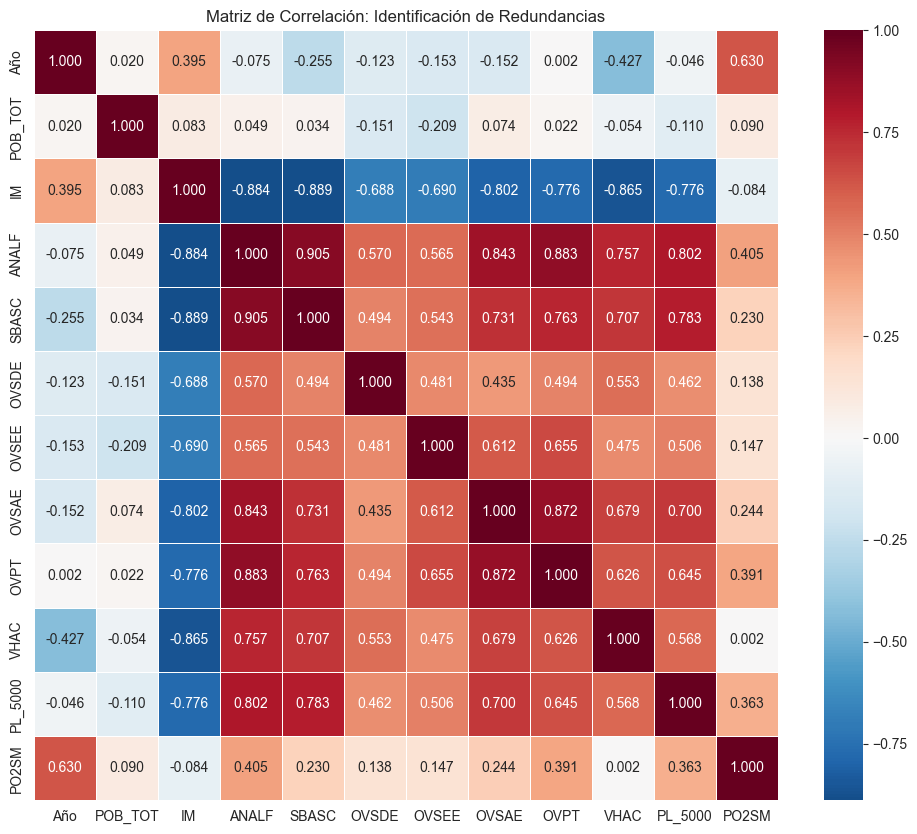

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ASEGÚRATE DE TENER df_final. Si no, corre el bloque del MERGE antes.
# Si df_final ya existe, este código generará la matriz:

try:
    # 1. Lista de variables independientes
    features = ['Año','POB_TOT','IM', 'ANALF', 'SBASC', 'OVSDE', 'OVSEE', 'OVSAE', 'OVPT', 'VHAC', 'PL_5000', 'PO2SM']
    
    # 2. Matriz de correlación
    matriz_correlacion = df_final[features].corr()

    # 3. Visualización del Heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(matriz_correlacion, 
                annot=True, 
                cmap='RdBu_r', 
                fmt=".3f", 
                center=0, 
                linewidths=0.5)
    plt.title('Matriz de Correlación: Identificación de Redundancias')
    plt.show()

except NameError:
    print("❌ ERROR: El dataframe 'df_final' no existe. Por favor, ejecuta la celda del MERGE primero.")

Al visualizar la tabla de correlación entre las variables, se detectó una muy alta correlación (superior al 0.90) entre las variables ANALF, SBASC, OVSDE, OVSEE, OVSAE y OVPT, debido a que todas ellas representan dimensiones del ámbito socioeconómico y de infraestructura básica de las personas que tienden a moverse en la misma dirección. Por lo cual, gran parte de estas variables serán eliminadas para evitar la redundancia de datos. En su lugar, se priorizará el uso del IM (Índice de Marginación), el cual es un indicador más preciso y robusto que ya toma en cuenta múltiples variables para su cálculo, funcionando como un resumen integral de la precariedad.

Además, se seleccionaron las variables de Hacinamiento (VHAC) y Bajos Ingresos (PO2SM) porque reflejan directamente la presión social y la falta de recursos económicos en los hogares. Se incluyó el hacinamiento de forma separada porque nos permite medir qué tan saturadas están las viviendas, un factor que suele estar muy ligado a conflictos y violencia. De esta manera, complementamos el IM con datos específicos sobre la calidad de vida y la economía de las familias, que son piezas clave para entender el aumento de los delitos.

Es vital excluir variables redundantes porque, si se mantienen el modelo puede sufrir de sobreajuste, aprendiendo ruido en lugar de patrones reales. Además, la redundancia dificulta la interpretación, si dejamos dos variables que dicen lo mismo, no sabremos cuál es la que realmente está impulsando el aumento en la tasa delictiva. Un modelo con menos variables, pero mejor seleccionadas, es más estable, rápido y fácil de explicar a los tomadores de decisiones.

El resultado es un subconjunto de características balanceado que cubre tres dimensiones clave:

- Entidad
- Año
- Índice de Marginación (IM): Dimensión Global.
- Hacinamiento (VHAC): Dimensión Social/Vivienda.
- Rezago Educativo (SBASC): Dimensión Educativa.
- Bajos Ingresos (PO2SM): Dimensión Económica.
- Tasa_Delictiva: Variable objetivo.

Este conjunto permite al modelo tener una visión clara sin redundancias.

Finalmente, se determinó que la variable Entidad funcionará únicamente como una etiqueta de identificación y no como una variable predictora. Por lo tanto, fue excluida de los conjuntos de entrenamiento y prueba. Esta decisión garantiza que el modelo desarrolle una capacidad de análisis basada en los indicadores de marginación y no en la entidad geográfica, evitando así el sobreajuste y permitiendo que el modelo sea aplicable a cualquier entidad federativa bajo condiciones socioeconómicas similares. Así se podrá garantizar que sus predicciones tengan una base causal y no sean una simple memorización de tendencias locales históricas.

In [20]:
# Definimos las variables que decidimos conservar
variables_finales = ['Entidad', 'Año', 'IM', 'VHAC', 'SBASC', 'PO2SM', 'Tasa_Delictiva']
# Creamos el dataset definitivo
df_modelo = df_final[variables_finales].copy()

print("--- DATASET LISTO PARA EL MODELO ---")
print(f"Variables seleccionadas: {list(df_modelo.columns)}")
display(df_modelo.head())

--- DATASET LISTO PARA EL MODELO ---
Variables seleccionadas: ['Entidad', 'Año', 'IM', 'VHAC', 'SBASC', 'PO2SM', 'Tasa_Delictiva']


,Entidad,Año,IM,VHAC,SBASC,PO2SM,Tasa_Delictiva
0,AGUASCALIENTES,2015,17.883964,21.862232,29.721797,34.604084,1770.454933
9,BAJA CALIFORNIA,2015,18.464138,23.032223,30.077841,22.845516,3653.032210
18,BAJA CALIFORNIA SUR,2015,17.320595,26.230970,29.439127,22.365039,3015.326623
27,CAMPECHE,2015,13.684555,37.931783,35.743791,40.693940,221.572543
36,CHIAPAS,2015,8.449801,44.460574,53.400565,62.463392,419.190986


**Construcción y comparación de modelos**

Para el análisis de la relación entre los indicadores de marginación y la incidencia delictiva, se implementaron dos enfoques de modelado distintos. En ambos casos, el dataset se dividió en un conjunto de entrenamiento (80%) y uno de prueba (20%) para garantizar una evaluación justa de su capacidad predictiva.

- Modelo Lineal (Regresión Lineal Múltiple): Se utilizó el método de Mínimos Cuadrados Ordinarios (OLS). Este modelo paramétrico busca establecer una relación proporcional directa entre las variables independientes ($IM,$ $VHAC,$ $SBASC,$ $PO2SM$) y la variable de respuesta ($Tasa\_Delictiva$). Su selección se justifica por su alta capacidad de interpretación y facilidad para realizar inferencias estadísticas mediante pruebas de hipótesis.

- Modelo No Lineal (Regresión Polinomial de Segundo Orden): Para la creación del modelo no lineal se utilizó un modelo polinomial de segundo orden.
Debido a esto se tendrán que transformar las variables previamente seleccionadas para incluir términos cuadráticos e interacciones entre indicadores. El objetivo es capturar curvaturas o efectos sinérgicos que una línea recta no puede modelar, asumiendo que el impacto de la marginación puede acelerarse bajo ciertas condiciones combinadas.

In [21]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error

# 1. PREPARACIÓN DE VARIABLES (X: Marginación, y: Tasa Delictiva)
X = df_modelo[['IM', 'VHAC', 'SBASC', 'PO2SM']]
y = df_modelo['Tasa_Delictiva']

# División Train/Test (Piso parejo para ambos modelos)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# =================================================================
# MODELO 1: REGRESIÓN LINEAL MÚLTIPLE (Paramétrico)
# =================================================================
# Añadimos constante (Beta 0)
X_train_lin = sm.add_constant(X_train)
modelo_lineal = sm.OLS(y_train, X_train_lin).fit()

# Predicción sobre el set de prueba
X_test_lin = sm.add_constant(X_test)
y_pred_lineal = modelo_lineal.predict(X_test_lin)

# =================================================================
# MODELO 2: REGRESIÓN NO LINEAL (Polinomial de 2do Orden)
# =================================================================
# Según la presentación, incluimos términos cuadráticos e interacciones
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Ajustamos el modelo OLS con las nuevas variables transformadas
X_train_poly_const = sm.add_constant(X_train_poly)
modelo_no_lineal = sm.OLS(y_train, X_train_poly_const).fit()

# Predicción No Lineal
X_test_poly_const = sm.add_constant(X_test_poly)
y_pred_no_lineal = modelo_no_lineal.predict(X_test_poly_const)

# =================================================================
# DESPLIEGUE DE RESULTADOS PARA EL REPORTE
# =================================================================
print("="*80)
print("1. DETALLES DEL MODELO LINEAL MÚLTIPLE")
print("="*80)
print(modelo_lineal.summary())

print("\n" + "="*80)
print("2. DETALLES DEL MODELO NO LINEAL (POLINOMIAL)")
print("="*80)
# Nombres de variables: originales + cuadráticas + interacciones
nombres_vars = poly.get_feature_names_out(['IM', 'VHAC', 'SBASC', 'PO2SM'])
print(modelo_no_lineal.summary(xname=['const'] + list(nombres_vars)))

print("\n" + "="*80)
print("3. COMPARATIVA DE DESEMPEÑO (SOBRE TEST SET)")
print("="*80)
print(f"R² Lineal:    {r2_score(y_test, y_pred_lineal):.4f}")
print(f"R² No Lineal: {r2_score(y_test, y_pred_no_lineal):.4f}")
print(f"MAE No Lineal: {mean_absolute_error(y_test, y_pred_no_lineal):.2f}")

1. DETALLES DEL MODELO LINEAL MÚLTIPLE
                            OLS Regression Results                            
Dep. Variable:         Tasa_Delictiva   R-squared:                       0.315
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     25.85
Date:                Thu, 19 Feb 2026   Prob (F-statistic):           1.23e-17
Time:                        10:38:01   Log-Likelihood:                -1836.1
No. Observations:                 230   AIC:                             3682.
Df Residuals:                     225   BIC:                             3699.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1

**Interpretación**

$Modelo$ $Lineal$

El modelo lineal permite observar la relevancia de cada variable, al observar la columna P-value, identificamos la validez de nuestras hipótesis. Variables con un P-value menor a 0.05 se declaran estadísticamente significativas, por lo que su relación con el crimen no es casual. La única variable significativa con un 95% de confianza fue el porcentaje de la población con ingresos de hasta 2 salarios mínimos (PO2SM). El resto de variable superaron el P-value de 0.05, por lo que se interpreta que de forma aislada y lineal, no explican los cambios en la delincuencia.

Hablando del modelo se obtuvo como resultado un valor de R-cuadrada de 0.315 y R-cuadrada ajustada de 0.303, interpretando estos resultado se puede confirmar que la selección de variables fue buena debido a que los valores de R-cuadrada y R-cuadrada ajustada son muy similares. A pesar de esto se interpreta a partir del valor R-cuadrada que el modelo explica el 31.5% de la variabilidad de la incidencia delictiva, dejando un gran margen sin explicar. Otra medida importante es el estadístico-F, el cual dio como resultado 25.85, un valor alto que valida el efecto real que tienen en conjunto las variables predictoras elegidas para este modelo.

$Modelo$ $no$ $Lineal$

El modelo no lineal buscó superar la aproximación lineal mediante la inclusión de términos cuadráticos e interacciones. A partir de los resultados podemos observar que en el modelo no lineal la variable Educación Básica (SBASC) junto con su término cuadrático ($SBASC^2$), se convierte en el eje central del modelo no lineal. La importancia de su variable cuadrática indica que la delincuencia no crece de forma proporcional a la falta de educación, sino que se dispara exponencialmente cuando el rezago educativo supera ciertos niveles críticos. Al combinar la falta de educación con el Índice de Marginación (IM) resultó ser significativa. Esto confirma que el impacto social de la marginación se potencia cuando se combina con un bajo nivel educativo, creando un entorno mucho más vulnerable a la criminalidad que la suma de ambos factores por separado. A diferencia del modelo inicial, el Índice de Marginación (IM) adquiere relevancia estadística propia con un P-value de 0.048. Esto demuestra que la marginación global sí influye en la delincuencia, pero su efecto estaba escondido en el modelo lineal al no considerar las curvaturas de los datos.

En cuanto al desempeño estadístico del modelo no lineal, se observó una evolución notable en las métricas de ajuste. Se obtuvo como resultado un valor de R-cuadrada de 0.362 y una R-cuadrada ajustada de 0.321. Al interpretar estos resultados, podemos concluir que la inclusión de términos cuadráticos e interacciones mejoró la capacidad explicativa del sistema. Aunque el margen sin explicar sigue siendo considerable, el incremento respecto al modelo lineal valida que la relación entre marginación y crimen no es puramente proporcional. La cercanía entre la R-cuadrada y su valor ajustado indica que, a pesar de haber aumentado la complejidad del modelo con más variables transformadas, no se ha incurrido en un sobreajuste innecesario.

Por otro lado, el estadístico-F en este modelo descendió a un valor de 8.722 con respecto al modelo lineal. Este decremento en el estadístico-F ocurrió debido a que se agregaron más variables y el modelo se convirtió en un modelo más pesado y complejo. Aunque el valor F bajó debido a esta mayor complejidad, el modelo es más profundo y preciso para detectar patrones ocultos.

$Resultados$ $de$ $test$

Para garantizar que los modelos no solo memorizan los datos de entrenamiento, sino que son capaces de predecir la realidad, se realizó una evaluación con el conjunto de prueba (20% de los datos). Los resultados obtenidos fueron los siguientes:

R² Lineal (0.3612): El modelo lineal logra explicar el 36.12% de la variabilidad del crimen en el set de prueba. Aunque es un resultado base aceptable, confirma que una estructura de línea recta deja fuera casi el 64% de la explicación del fenómeno.

R² No Lineal (0.4066): Al implementar la regresión de segundo orden, la capacidad explicativa subió al 40.66%. Este incremento de casi 5 puntos porcentuales es significativo; demuestra que al incluir curvaturas (términos cuadráticos) e interacciones, el modelo captura patrones de marginación que el modelo lineal simplemente ignora.

MAE No Lineal (483.89): El Error Medio Absoluto nos indica que, en promedio, las predicciones del modelo no lineal se desvían apenas 483.89 unidades de la tasa delictiva real. Este valor representa la precisión del modelo para estimar la seguridad en los estados.

Tanto en el modelo lineal como en el no lineal, el coeficiente de determinación ($R^2$) fue mayor en el conjunto de prueba que en el de entrenamiento. Mientras que en entrenamiento el modelo lineal explicaba el 31.5%, en el set de prueba este valor ascendió al 36.12% y de 36.2% hasta el 40.66% en el no lineal .Este fenómeno se explica debido a que los modelos normalmente rinden mejor en los datos de entrenamiento que ya conocen. Sin embargo, cuando el $R^2$ es mayor en el set de prueba, es una señal clara de que el modelo no está sobreajustado. Significa que las reglas que el modelo aprendió para predecir son patrones reales y sólidos que se mantienen, e incluso se vuelven más claros, en datos nuevos.

Es por esto que el modelo más adecuado para el problema analizado en este reporte es el modelo no lineal, debido a que la delincuencia en México no se comporta como una línea recta. Mientras que el modelo lineal solo nos decía que el dinero influía, el modelo no lineal descubrió que la falta de educación y la marginación son las verdaderas claves cuando se combinan.

Las estadísticas respaldan esta decisión debido a que el modelo no lineal logró explicar el 40.66% de los casos, superando al modelo lineal que sólo explicaba el 36.12%. Además, al probarlo con datos nuevos que el modelo no conocía, demostró ser muy confiable y se equivocó menos con un margen de error de 483.89 unidades. Este modelo es mejor porque entiende que los problemas sociales se vuelven más peligrosos cuando se juntan, permitiéndonos identificar con mayor claridad dónde se necesita intervenir para reducir la violencia.


**Evaluación del desempeño del modelo**

Para determinar la fiabilidad de este análisis ante escenarios reales y nuevos datos, evaluamos el modelo bajo dos métricas complementarias. La primera es su capacidad de explicación y su precisión predictiva. Para esto se utilizó el coeficiente de determinación $R^2$ (0.4066) obtenido en nuestro modelo no lineal, el cual indica que las variables de marginación logran explicar el 41% de las variaciones en los índices de delincuencia. Aunque existe un 59% de factores invisibles, capturar casi la mitad de un fenómeno tan complejo basándose únicamente en carencias sociales nos brinda una base científica sólida. Esto confirma que la marginación es en gran medida, el problema estructural del crimen y permite al modelo identificar tendencias claras incluso al enfrentarse a información nueva. La segunda métrica utilizada fue el Margen de Error (MAE) de 483.89 unidades actúa como una regla de medición en la práctica. Esta métrica nos indica que en promedio, las predicciones del modelo suelen estar a una distancia de 484 unidades respecto al dato real. Más allá de una cifra, este margen funciona como un sistema de auditoría preventiva, si al analizar un estado nuevo el crimen real supera significativamente este umbral, el modelo señala que en dicha región ocurren eventos extraordinarios que la marginación no alcanza a explicar, lo que exige una intervención de seguridad y diferenciada de las políticas sociales.

**Análisis de inferencia y conclusiones**

A partir del modelo no lineal, podemos realizar inferencias clave sobre la seguridad en México. La conclusión principal es que la delincuencia no es causada por un solo factor, sino por una acumulación de carencias. El modelo revela que el rezago educativo (SBASC) es el predictor más peligroso dando a entender que cuando la falta de educación básica se combina con un alto índice de marginación, la probabilidad de violencia se dispara. Esto nos permite inferir que mejorar el ingreso económico es útil, pero atacar el rezago educativo es lo que realmente podría frenar el crecimiento del crimen en los estados más vulnerables.

En cuanto a la precisión, el modelo presenta un margen de error promedio (MAE) de 483.89 unidades. Esto significa que nuestras conclusiones son altamente confiables para identificar tendencias generales y estados en riesgo, aunque se debe ser precavido al intentar predecir cifras exactas en estados con situaciones de seguridad muy atípicas. El alcance de este estudio es estatal, lo que permite a las autoridades federales saber qué regiones necesitan prioridad en inversión social, aunque tiene la limitación de sólo considerar problemas sociales y no considerar diferentes factores como el número de policías o cambios repentinos en operativos de seguridad.

Como reflexión final, los resultados demuestran que la delincuencia tiene una raíz social. Es un problema que se potencia a sí mismo, la marginación y la falta de escuela crean un entorno que el modelo lineal no alcanza a ver, pero que el modelo no lineal identifica claramente como la razón del problema. Para trabajos futuros, sería muy valioso incluir datos sobre la presencia de fuerzas de seguridad o desglosar la información a nivel municipal, lo que permitiría ver si estas curvas de riesgo se vuelven aún más extremas en comunidades pequeñas. Este análisis es un primer paso para entender que para bajar el crimen, primero hay que elevar las oportunidades educativas y sociales.

**Seccion de representación extra**

Esta sección extra fue diseñada para transformar los números y las predicciones del modelo en una herramienta visual que sea fácil de entender para cualquier persona. El objetivo principal es pasar de la teoría estadística a un Tablero de Diagnóstico Estratégico que permita ver la realidad de la seguridad en México de forma clara.

En esta parte del proyecto se creo un gráfico de cuatro cuadrantes donde ubicamos a los estados según su nivel de pobreza y educación. Esto nos permite separar visualmente las zonas que están en una Zona Segura de aquellas que estan en una Zona de Riesgo por sus carencias sociales. Se utilizaron burbujas de colores para representar la tasa de delitos. Así, es muy fácil notar que donde hay menos educación y más marginación, los círculos se vuelven más grandes y rojos, confirmando lo que nuestro modelo predijo.

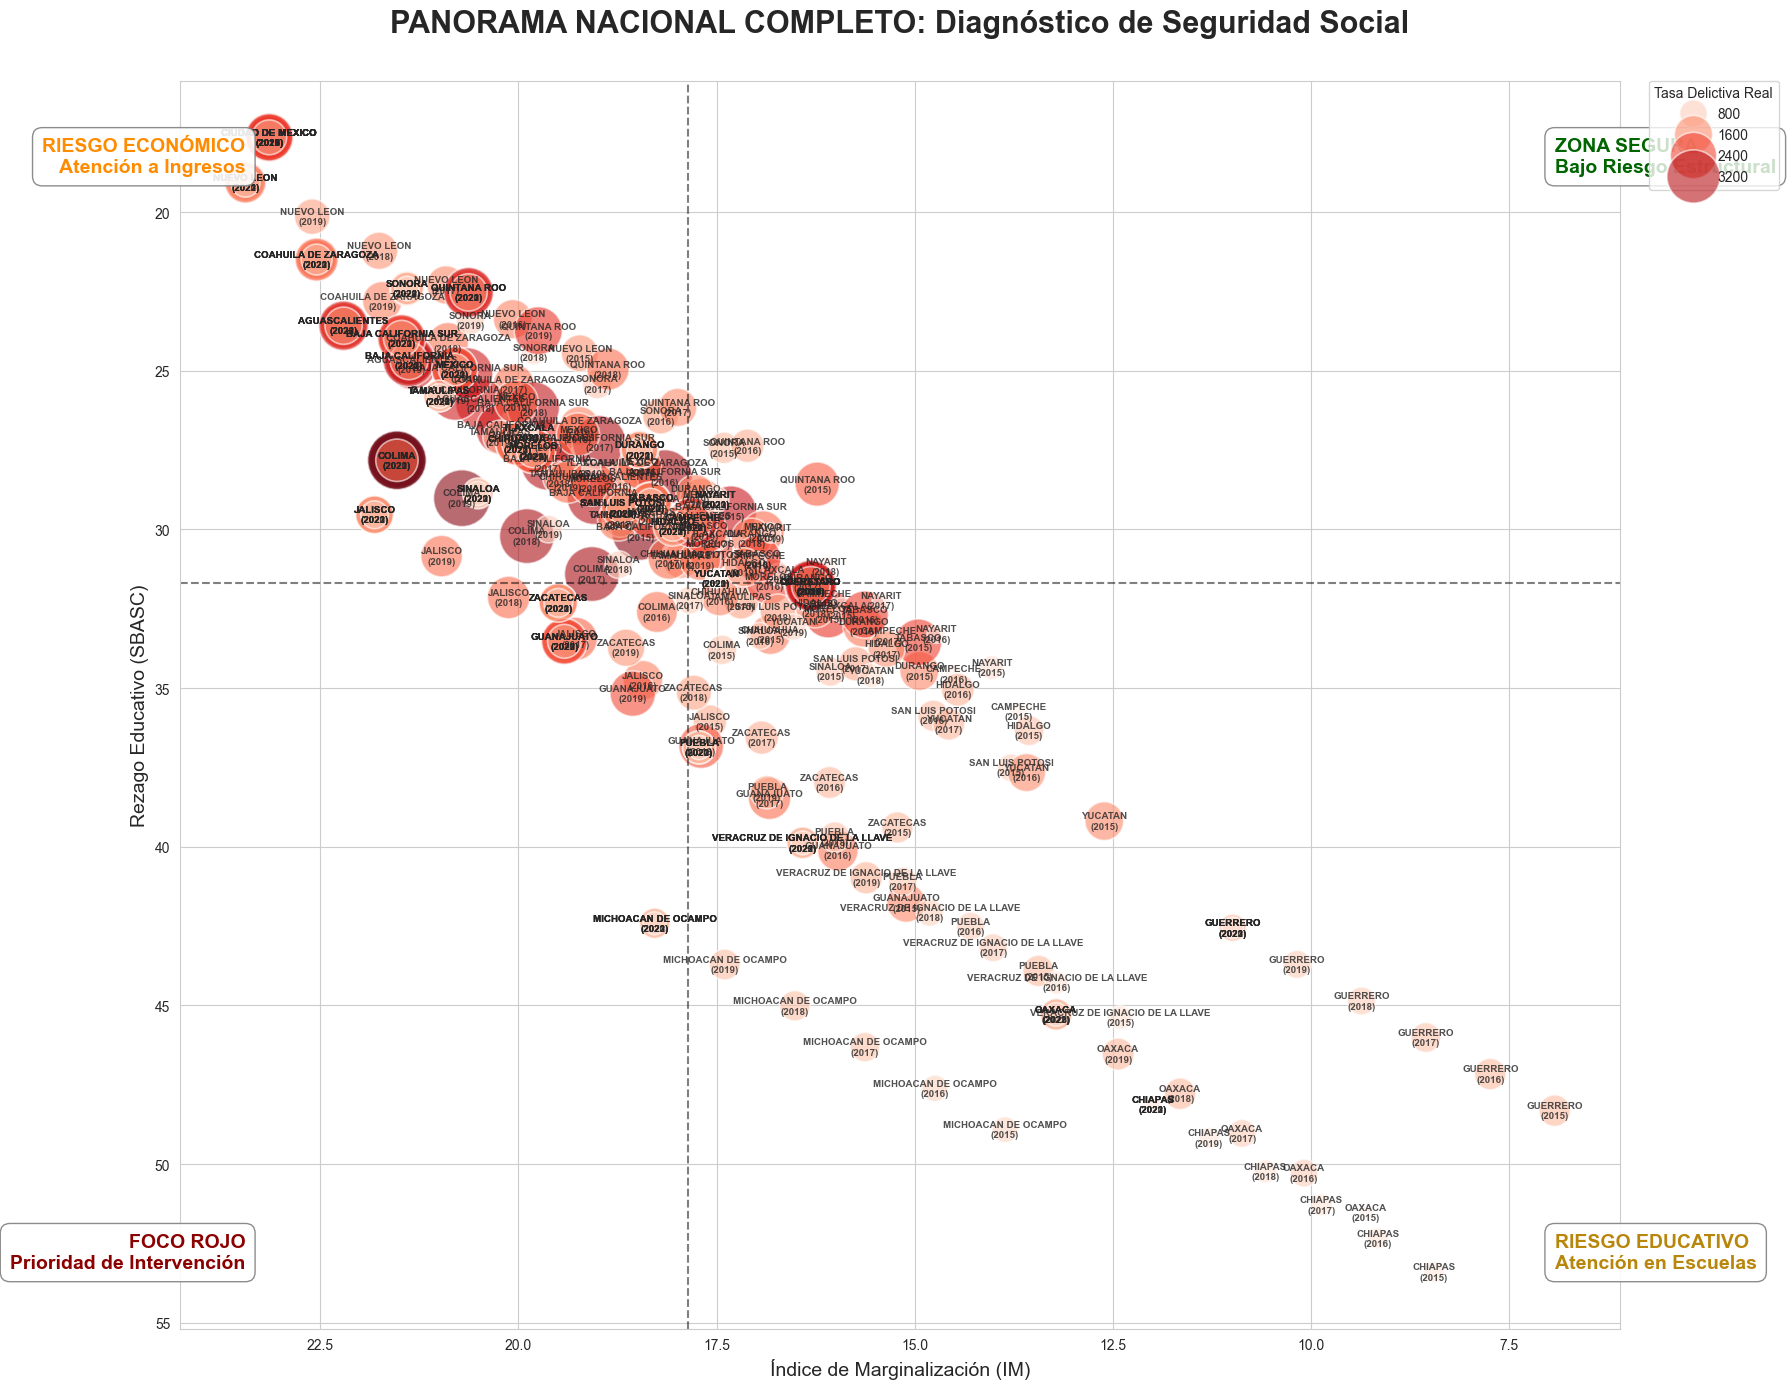

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Preparar TODO el conjunto de datos
df_full = df_modelo.copy()

# Generamos predicciones para todos los datos usando el modelo no lineal ya entrenado
# Nota: poly es el objeto PolynomialFeatures que definiste arriba
X_full = df_full[['IM', 'VHAC', 'SBASC', 'PO2SM']]
X_full_poly = poly.transform(X_full)
X_full_poly_const = sm.add_constant(X_full_poly)

df_full['Prediccion_No_Lineal'] = modelo_no_lineal.predict(X_full_poly_const)
df_full['Tasa_Real'] = df_modelo['Tasa_Delictiva']

# 2. Configurar el tablero (Tamaño extra grande para que quepan todos los puntos)
plt.figure(figsize=(18, 14))
sns.set_style("whitegrid")

# 3. Gráfico de burbujas con TODOS los datos
scatter = sns.scatterplot(
    data=df_full, 
    x='IM', 
    y='SBASC', 
    size='Tasa_Real', 
    hue='Tasa_Real', 
    palette='Reds', 
    sizes=(80, 1800), # Ajustado levemente por la densidad de puntos
    alpha=0.6
)

# --- INVERSIÓN DE EJES ---
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

# 4. Líneas divisorias basadas en la media global
plt.axhline(df_full['SBASC'].mean(), color='black', linestyle='--', alpha=0.5)
plt.axvline(df_full['IM'].mean(), color='black', linestyle='--', alpha=0.5)

# 5. Etiquetas de Estados (Solo si no hay demasiados puntos, o se volverá ilegible)
# He bajado el fontsize a 7 para manejar el volumen de datos
for i in df_full.index:
    plt.text(
        df_full.loc[i, 'IM'], 
        df_full.loc[i, 'SBASC'], 
        f"{df_full.loc[i, 'Entidad']}\n({df_full.loc[i, 'Año']})", 
        fontsize=7, ha='center', va='center', fontweight='bold', alpha=0.8
    )

# 6. Títulos de los cuadrantes con CUADROS (bbox)
box_style = dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.9, edgecolor='gray')

plt.text(df_full['IM'].min(), df_full['SBASC'].min(), 
         'ZONA SEGURA\nBajo Riesgo Estructural', 
         fontsize=14, color='darkgreen', fontweight='bold', ha='left', va='top', bbox=box_style)

plt.text(df_full['IM'].max(), df_full['SBASC'].max(), 
         'FOCO ROJO\nPrioridad de Intervención', 
         fontsize=14, color='darkred', fontweight='bold', ha='right', va='bottom', bbox=box_style)

plt.text(df_full['IM'].min(), df_full['SBASC'].max(), 
         'RIESGO EDUCATIVO\nAtención en Escuelas', 
         fontsize=14, color='#b8860b', fontweight='bold', ha='left', va='bottom', bbox=box_style)

plt.text(df_full['IM'].max(), df_full['SBASC'].min(), 
         'RIESGO ECONÓMICO\nAtención a Ingresos', 
         fontsize=14, color='darkorange', fontweight='bold', ha='right', va='top', bbox=box_style)

# 7. Finalización
plt.title('PANORAMA NACIONAL COMPLETO: Diagnóstico de Seguridad Social', fontsize=22, pad=35, fontweight='bold')

plt.xlabel('Índice de Marginalización (IM)', fontsize=14)
plt.ylabel('Rezago Educativo (SBASC)', fontsize=14)

plt.legend(title='Tasa Delictiva Real', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.tight_layout()
plt.show()

Este gráfico simula un semáforo social. En la esquina superior derecha pusimos los estados que están mejor (con más educación y menos pobreza), y en la esquina inferior izquierda los que tienen más carencias. El tamaño de los círculos nos dice qué tanta delincuencia hay, entre más grande y rojo es el círculo, más peligroso es el lugar.

El mapa nos muestra claramente que la delincuencia no es casualidad. Los círculos más grandes siempre se amontonan en la zona de Foco Rojo. Esto confirma que cuando falta escuela y hay mucha pobreza, la delincuencia crece con mucha más fuerza. El modelo nos dice que no es una línea recta; es como una bola de nieve: un poquito más de rezago educativo puede hacer que la inseguridad crezca muchísimo.

Posteriormente se desarrollo un buscador que permite elegir cualquier estado de la República para ver su evolución a través de los años. A traves de esto cualquier persona interesada puede interactuar con el grafico y obtener informacion valiosa de las entidades en las que viven. Ademas sirve para comparar visualmente las situaciones de diferentes estados a traves de los años y observar su hubo una mejora o reduccion en las variables.

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from ipywidgets import interact, widgets

# 1. Función principal del Tablero Interactivo
def graficar_entidad(entidad_seleccionada):
    # Limpieza y filtrado
    df_modelo['Entidad_Clean'] = df_modelo['Entidad'].str.strip().str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8').str.upper()
    
    # Normalizamos la selección del usuario para que coincida
    seleccion_norm = entidad_seleccionada.strip().upper()
    df_sel = df_modelo[df_modelo['Entidad_Clean'] == seleccion_norm].copy()

    if df_sel.empty:
        print(f"No hay datos suficientes para {entidad_seleccionada}")
        return

    # 2. Preparar Predicciones
    X_sel = df_sel[['IM', 'VHAC', 'SBASC', 'PO2SM']]
    X_sel_poly = poly.transform(X_sel)
    X_sel_poly_const = sm.add_constant(X_full_poly, has_constant='add')[:len(df_sel)] # Ajuste de dimensiones
    
    df_sel['Prediccion'] = modelo_no_lineal.predict(sm.add_constant(X_sel_poly, has_constant='add'))
    df_sel['Tasa_Real'] = df_sel['Tasa_Delictiva']

    # 3. Configurar Visualización
    plt.figure(figsize=(15, 10))
    sns.set_style("whitegrid")
    
    # Dibujamos TODOS los puntos de fondo en gris claro para contexto nacional
    sns.scatterplot(data=df_modelo, x='IM', y='SBASC', color='lightgray', alpha=0.3, s=50)

    # Dibujamos los puntos de la ENTIDAD SELECCIONADA
    scatter = sns.scatterplot(
        data=df_sel, x='IM', y='SBASC', 
        size='Tasa_Real', hue='Tasa_Real', 
        palette='Reds', sizes=(400, 3000), alpha=0.9, edgecolor='black'
    )

    # Inversión de ejes (Lógica de "Mejorar" hacia arriba a la derecha)
    plt.gca().invert_xaxis()
    plt.gca().invert_yaxis()

    # Líneas divisorias nacionales (Medias globales)
    plt.axhline(df_modelo['SBASC'].mean(), color='black', linestyle='--', alpha=0.4)
    plt.axvline(df_modelo['IM'].mean(), color='black', linestyle='--', alpha=0.4)

    # 4. Etiquetas de Año para la entidad seleccionada
    for i in df_sel.index:
        plt.text(df_sel.loc[i, 'IM'], df_sel.loc[i, 'SBASC'], 
                 f"{int(df_sel.loc[i, 'Año'])}", 
                 fontsize=10, ha='center', va='center', fontweight='bold')

    # 5. Cuadros de Cuadrantes
    box_style = dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.8, edgecolor='gray')
    plt.text(df_modelo['IM'].min(), df_modelo['SBASC'].min(), 'ZONA SEGURA', fontsize=12, fontweight='bold', ha='left', va='top', bbox=box_style, color='darkgreen')
    plt.text(df_modelo['IM'].max(), df_modelo['SBASC'].max(), 'FOCO ROJO', fontsize=12, fontweight='bold', ha='right', va='bottom', bbox=box_style, color='darkred')

    plt.title(f'DIAGNÓSTICO ESTRATÉGICO: {entidad_seleccionada.upper()}', fontsize=20, pad=25, fontweight='bold')
    plt.xlabel('Índice de Marginalización (IM)', fontsize=14)
    plt.ylabel('Rezago Educativo (SBASC)', fontsize=14)
    
    plt.legend(title='Tasa Delictiva Real', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.subplots_adjust(right=0.85)
    plt.show()

# 6. Crear el menú desplegable con las 32 entidades
lista_entidades = sorted(df_modelo['Entidad'].unique())
interact(graficar_entidad, entidad_seleccionada=widgets.Dropdown(
    options=lista_entidades,
    value='NUEVO LEON', # Valor por defecto
    description='Entidad:',
    disabled=False,
))

interactive(children=(Dropdown(description='Entidad:', index=18, options=('AGUASCALIENTES', 'BAJA CALIFORNIA',…

<function __main__.graficar_entidad(entidad_seleccionada)>

**Referencias Bibliograficas**

- Beelzabi. (2023). Crimen en México (crimen-mx) [Conjunto de datos]. Kaggle. https://www.kaggle.com/datasets/beelzabi/crimen-mx
- Consejo Nacional de Población [CONAPO]. (2020). Índice de Marginación por Entidad Federativa y Municipio 2020. Gobierno de México. https://www.gob.mx/conapo/documentos/indices-de-marginacion-2020-284372
- Google Gemini. (2026). Gemini (Versión 3.0 Flash) [Modelo de lenguaje grande]. https://gemini.google.com/
- Instituto Nacional de Estadística y Geografía [INEGI]. (2020). Censo de Población y Vivienda 2020. https://www.inegi.org.mx/programas/ccpv/2020/
- Martínez Torteya, A. (2026). SC3314 – Inteligencia Artificial [Material de clase]. Departamento de Ingeniería, Universidad de Monterrey.
- México Evalúa. (2024). Hallazgos 2023: Seguimiento y evaluación del sistema de justicia penal en México. Centro de Análisis de Políticas Públicas. https://www.mexicoevalua.org/
- Secretariado Ejecutivo del Sistema Nacional de Seguridad Pública [SESNSP]. (2024). Incidencia Delictiva del Fuero Común. Gobierno de México. https://www.gob.mx/sesnsp/acciones-y-programas/incidencia-delictiva-del-fuero-comun-nueva-metodologia